# Data Survivor

### Members:
1.Dewi<br>
2.Patrick<br>
3.Ramzy<br>
4.Stella<br>
5.Wahyu<br>

# 1. Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 2. Load Dataset

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/IYKRA/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Check Data Quality

In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income',
       'Spending Score']

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 4. Select Feature 

In [ ]:
dataset=dataset.replace(['Male','Female'],(0,1))

In [ ]:
X = dataset.loc[:, ['Gender', 'Age', 'Annual Income','Spending Score']]
X.head()

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# 5. Clustering with DBSCAN

In [ ]:
X

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
X

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


## 5.1 Evaluation with Silhouette Score

In [ ]:
import numpy as np
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
for eps in [i/10 for i in range(6,8)]:
    for min_samples in range(7,10):
        print('\neps={}'.format(eps))
        print('min_samples={}'.format(min_samples))
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        silh = silhouette_score(X_scaled, labels)
        print("Clusters present: {}".format(np.unique(labels)))
        print("Clusters size: {}".format(np.bincount(labels + 1)))
        print('Silhouette Score: {}'.format(silh))


eps=0.6
min_samples=7
Clusters present: [-1  0  1  2  3  4  5  6  7]
Clusters size: [98  9 20 19 12  7  8 17 10]
Silhouette Score: 0.07422790265515827

eps=0.6
min_samples=8
Clusters present: [-1  0  1  2  3  4  5  6]
Clusters size: [111   8  18  19   9   8  17  10]
Silhouette Score: 0.02471513274426008

eps=0.6
min_samples=9
Clusters present: [-1  0  1  2  3]
Clusters size: [137  18  19   9  17]
Silhouette Score: -0.018891339236761492

eps=0.7
min_samples=7
Clusters present: [-1  0  1  2  3  4  5]
Clusters size: [68 63  6 23 10 11 19]
Silhouette Score: 0.1030135009001276

eps=0.7
min_samples=8
Clusters present: [-1  0  1  2  3  4]
Clusters size: [76 62 23 10 19 10]
Silhouette Score: 0.12362026848194813

eps=0.7
min_samples=9
Clusters present: [-1  0  1  2  3  4  5]
Clusters size: [82 30 29 23 10 17  9]
Silhouette Score: 0.14390667899426995


**Kami memilih Silhoutte Score yang memiliki Score tertinggi yaitu:**
- Eps = 0.7
- min_samples = 9

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=9)
labels = dbscan.fit_predict(X_scaled)
silh = silhouette_score(X_scaled, labels)

## 5.2 Result

In [ ]:
X_hc = X.copy()
X_hc['cluster'] = labels
X_hc.head()

,Gender,Age,Annual Income,Spending Score,cluster
0,0,19,15,39,-1
1,0,21,15,81,-1
2,1,20,16,6,-1
3,1,23,16,77,0
4,1,31,17,40,-1


In [ ]:
X_hc.cluster.unique()

array([-1,  0,  2,  1,  3,  5,  4], dtype=int64)

# 6. Analysis

## 6.1 Analysis Cluster based on Pivot Table

In [ ]:
import numpy as np
pd.pivot_table(X_hc, values=['Annual Income', 'Spending Score', 'Age'],
               index='cluster', aggfunc=[np.mean, np.max, np.min])

mean                              amax                \
               Age Annual Income Spending Score  Age Annual Income   
cluster                                                              
-1       38.414634     63.024390      38.670732   68           137   
 0       25.033333     47.633333      56.066667   34            76   
 1       51.034483     55.586207      47.965517   68            79   
 2       56.782609     55.347826      47.391304   70            77   
 3       21.600000     56.900000      52.600000   27            67   
 4       31.470588     80.470588      81.823529   38            98   
 5       36.888889     77.000000      87.666667   40            93   

                       amin                               
        Spending Score  Age Annual Income Spending Score  
cluster                                                   
-1                  99   18            15              1  
 0                  87   18            16             29  
 1                  59   38            39             28  
 2                  60   40            39             35  
 3                  59   18            46             41  
 4                  95   27            70             71  
 5                  95   32            69             75

In [ ]:
a = pd.pivot_table(X_hc, values=['Annual Income', 'Spending Score', 'Age'],
               index='cluster', aggfunc=[np.max, np.min])

#### Age<br>
source =  https://sepakat.bappenas.go.id/wiki/Kelompok_Usia

15-24 tahun: Kelompok usia muda.<br>
25-34 tahun: Kelompok usia pekerja awal.<br>
35-44 tahun: Kelompok usia paruh baya.<br>
45-54 tahun: Kelompok usia pra-pensiun.<br>
55-64 tahun: Kelompok usia pensiun.<br>

#### Spending Score<br>
<30: Rendah<br>
30-60: Sedang<br>
60> : Tinggi<br>

#### Annual Income<br>

<30: Rendah<br>
30-60: Sedang<br>
60>: Tinggi<br>

- Cluster 0 adalah cluster dengan **rata-rata Age**=pekerja awal, **rata-rata Annual Income**=sedang dan **rata-rata Spending Score**=Sedang
- Cluster 1 adalah dengan **rata-rata Age**=Pra-pensiun, **rata-rata Annual Income**=sedang dan **rata-rata Spending Score**=Sedang
- Cluster 2 adalah dengan **rata-rata Age**=Pra-pensiun, **rata-rata Annual Income**=sedang dan **rata-rata Spending Score**=Sedang
- Cluster 3 adalah dengan **rata-rata Age**=Usia muda, **rata-rata Annual Income**=sedang dan **rata-rata Spending Score**= Sedang
- Cluster 4 adalah dengan **rata-rata Age**=Pekerja awal, **rata-rata Annual Income**=tinggi dan **rata-rata Spending Score**=tinggi
- Cluster 5 adalah dengan **rata-rata Age**=Paruh baya dengan **rata-rata Annual Income**=tinggi dan **rata-rata Spending Score**=tinggi

## 6.2 Analysis per Cluster 

### Cluster 0

In [ ]:
cluster_0 = X_hc[X_hc['cluster']==0]

In [ ]:
cluster_0

,Gender,Age,Annual Income,Spending Score,cluster
3,1,23,16,77,0
5,1,22,17,76,0
13,1,24,20,77,0
29,1,23,29,87,0
31,1,21,30,73,0
35,1,21,33,81,0
37,1,30,34,73,0
39,1,20,37,75,0
43,1,31,39,61,0
45,1,24,39,65,0


In [ ]:
a.loc[0] # min max di cluster 0

amax  Age               34
      Annual Income     76
      Spending Score    87
amin  Age               18
      Annual Income     16
      Spending Score    29
Name: 0, dtype: int64

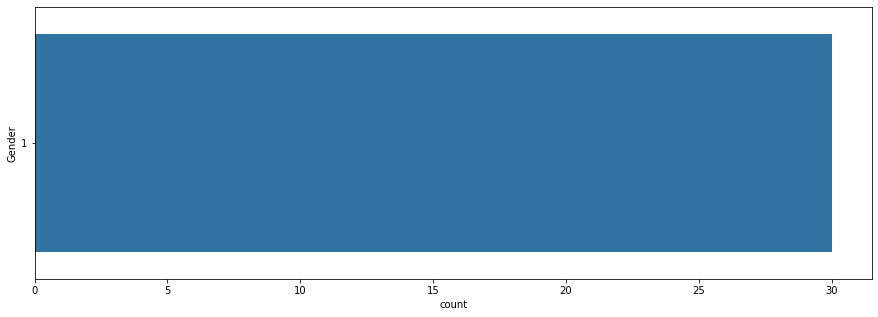

In [ ]:
#Count Plot of Gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = cluster_0)
plt.show()

Dari grafik di atas, ternyata pada cluster 0 secara keseluruhan diisi oleh **Female**

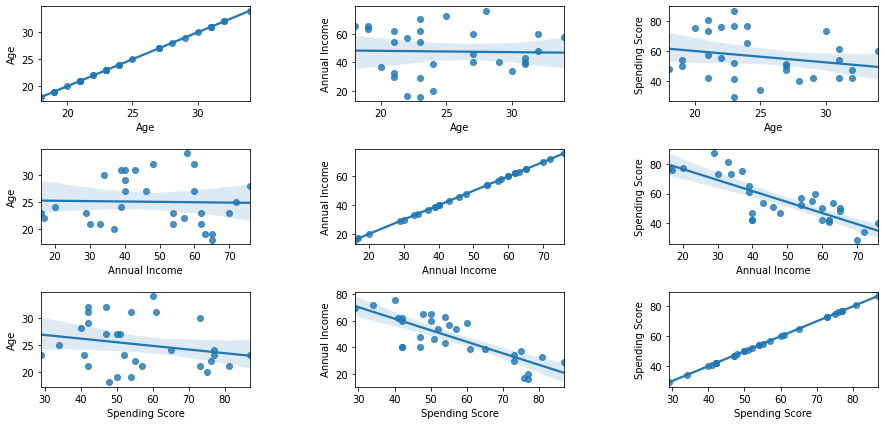

In [ ]:
#Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = cluster_0)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

1. Jika kita lihat pada grafik **Spending Score vs Annual Income**<br>

Terlihat sebuah trend yang menurun, dimana ketika Annual Income membesar tetapi Spending Score menurun.<br>

Artinya kami harus memberikan treatment pada cluster ini agar customer yang memiliki Annual Income besar mau berbelanja lebih banyak di toko kami.

# -----------------------------------------------------------------------------------------------------------

### Cluster 1

In [ ]:
cluster_1 = X_hc[X_hc['cluster']==1]

In [ ]:
cluster_1

,Gender,Age,Annual Income,Spending Score,cluster
44,1,49,39,28,1
46,1,50,40,55,1
50,1,49,42,52,1
54,1,50,43,45,1
56,1,51,44,50,1
62,1,67,47,52,1
63,1,54,47,59,1
66,1,43,48,50,1
67,1,68,48,48,1
71,1,47,49,42,1


In [ ]:
a.loc[1] # min max di cluster 1

amax  Age               68
      Annual Income     79
      Spending Score    59
amin  Age               38
      Annual Income     39
      Spending Score    28
Name: 1, dtype: int64

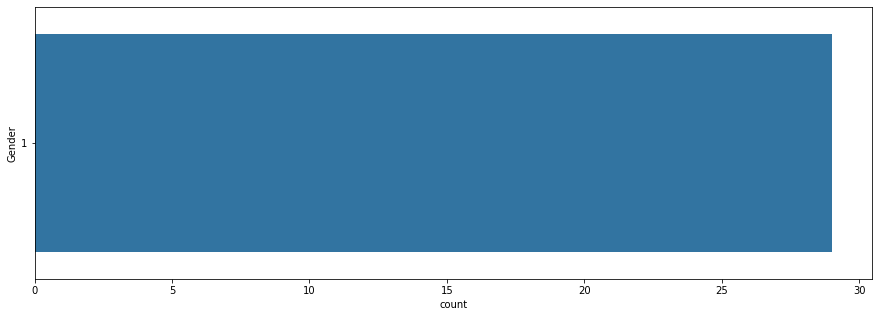

In [ ]:
#Count Plot of Gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = cluster_1)
plt.show()

Dari grafik di atas, ternyata pada cluster 1 secara keseluruhan diisi oleh **Female**

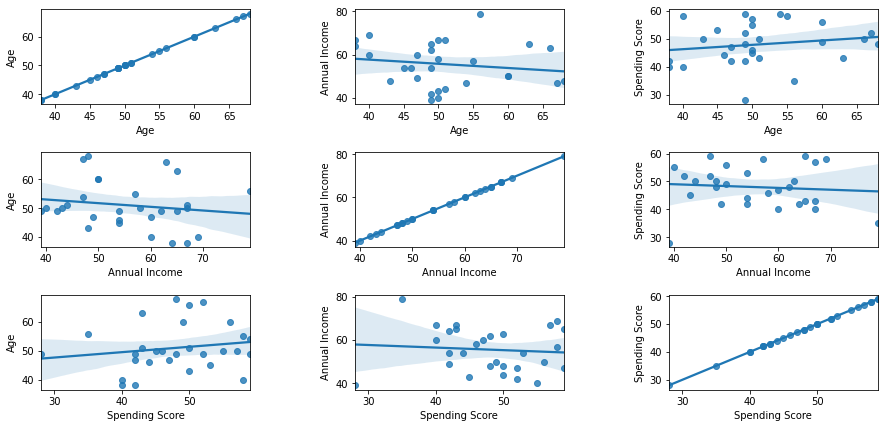

In [ ]:
#Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = cluster_1)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

1. Jika kita lihat pada grafik **Spending Score vs Annual Income**<br>

Hampir tidak ada trend, dimana ketika Annual Income berapapun Spending Score memiliki score yang sama yaitu 50.<br>

2. Jika kita lihat pada grafik **Spending Score vs Age**<br>

terlihat ada sebuah trend naik, ketika Age bertambah maka Spending Score bertambah

Artinya kami harus memberikan treatment pada cluster ini agar customer yang memiliki Age sekitar 40 an mau berbelanja lebih banyak di toko kami.

# -------------------------------------------------------------------------------------------------------------

### Cluster 2

In [ ]:
cluster_2 = X_hc[X_hc['cluster']==2]

In [ ]:
cluster_2

,Gender,Age,Annual Income,Spending Score,cluster
42,0,48,39,36,2
53,0,59,43,60,2
55,0,47,43,41,2
57,0,69,44,46,2
59,0,53,46,46,2
60,0,70,46,56,2
64,0,63,48,51,2
70,0,70,49,55,2
74,0,59,54,47,2
77,0,40,54,48,2


In [ ]:
a.loc[2] # min max di cluster 2

amax  Age               70
      Annual Income     77
      Spending Score    60
amin  Age               40
      Annual Income     39
      Spending Score    35
Name: 2, dtype: int64

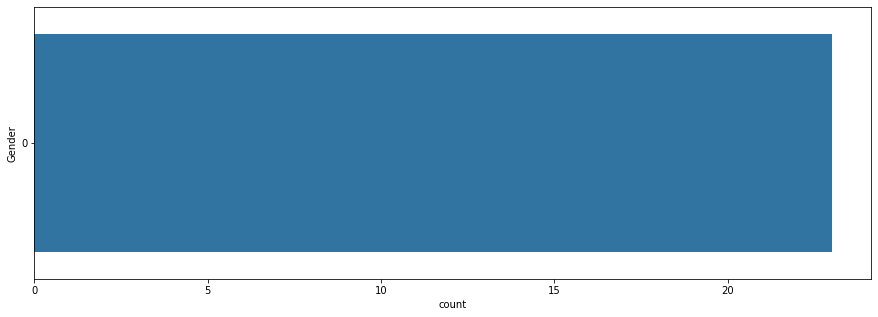

In [ ]:
#Count Plot of Gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = cluster_2)
plt.show()

Dari grafik di atas, ternyata pada cluster 2 secara keseluruhan diisi oleh **Male**

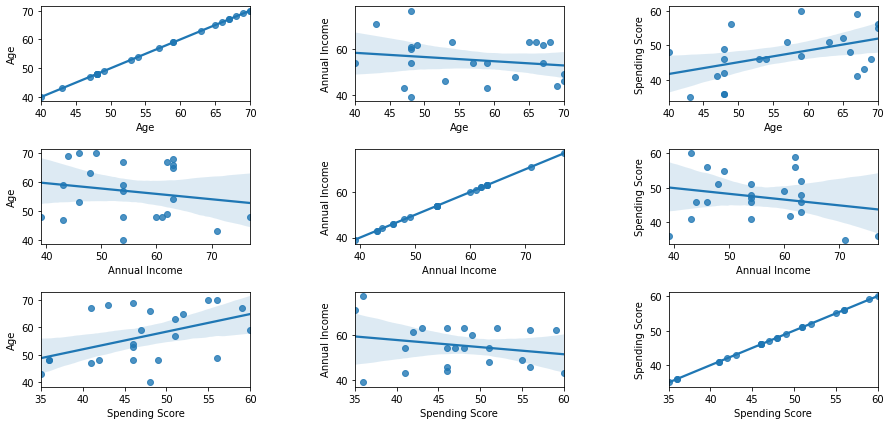

In [ ]:
#Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = cluster_2)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

1. Jika kita lihat pada grafik **Spending Score vs Annual Income**<br>

Terlihat ada trend menurun, dimana ketika Annual Income membesar tetapi Spending Score menurun.<br>

Artinya kami harus memberikan treatment pada cluster ini agar customer yang memiliki Annual Income tinggi mau berbelanja lebih di toko kami.

2. Jika kita lihat pada grafik **Spending Score vs Age**<br>

terlihat ada sebuah trend naik, ketika Age bertambah maka Spending Score bertambah

Artinya kami harus memberikan treatment pada cluster ini agar customer yang memiliki Age sekitar 40 an mau berbelanja lebih

# ----------------------------------------------------------------------------------------------------------- 

### Cluster 3

In [ ]:
cluster_3 = X_hc[X_hc['cluster']==3]

In [ ]:
cluster_3

,Gender,Age,Annual Income,Spending Score,cluster
61,0,19,46,55,3
65,0,18,48,59,3
68,0,19,48,59,3
75,0,26,54,54,3
91,0,18,59,41,3
95,0,24,60,52,3
99,0,20,61,49,3
103,0,26,62,55,3
113,0,19,64,46,3
120,0,27,67,56,3


In [ ]:
a.loc[3] # min max di cluster 3

amax  Age               27
      Annual Income     67
      Spending Score    59
amin  Age               18
      Annual Income     46
      Spending Score    41
Name: 3, dtype: int64

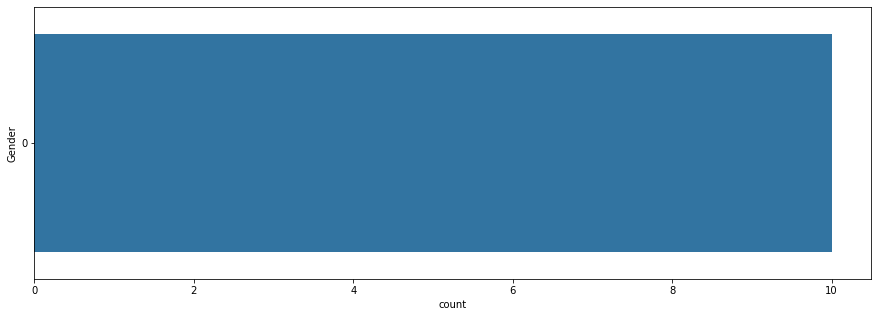

In [ ]:
#Count Plot of Gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = cluster_3)
plt.show()

Dari grafik di atas, ternyata pada cluster 3 secara keseluruhan diisi oleh **Male**

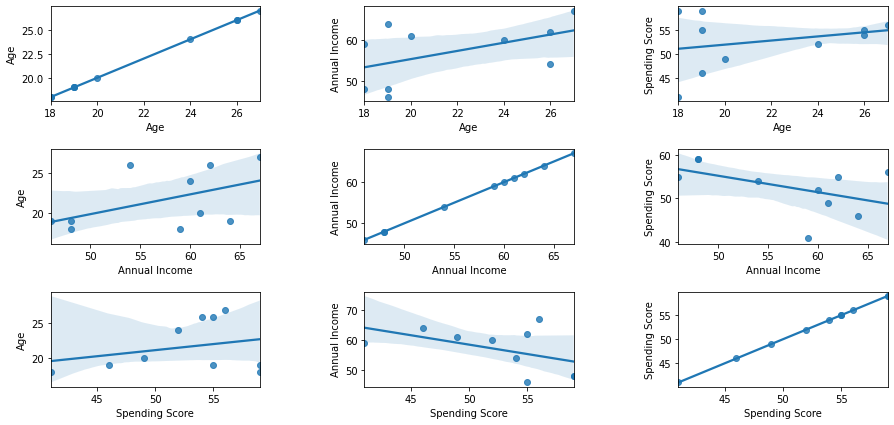

In [ ]:
#Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = cluster_3)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

1. Jika kita lihat pada grafik **Spending Score vs Annual Income**<br>

Terlihat ada trend menurun, dimana ketika Annual Income membesar tetapi Spending Score menurun.<br>

Artinya kami harus memberikan treatment pada cluster ini agar customer yang memiliki Annual Income tinggi mau berbelanja lebih di toko kami.

# --------------------------------------------------------------------------------------------------------------

### Cluster 4

In [ ]:
cluster_4 = X_hc[X_hc['cluster']==4]

In [ ]:
cluster_4

,Gender,Age,Annual Income,Spending Score,cluster
125,1,31,70,77,4
133,1,31,72,71,4
135,1,29,73,88,4
139,1,35,74,72,4
143,1,32,76,87,4
147,1,32,77,74,4
153,1,38,78,76,4
155,1,27,78,89,4
157,1,30,78,78,4
159,1,30,78,73,4


In [ ]:
a.loc[4].T # min max di cluster 4

amax  Age               38
      Annual Income     98
      Spending Score    95
amin  Age               27
      Annual Income     70
      Spending Score    71
Name: 4, dtype: int64

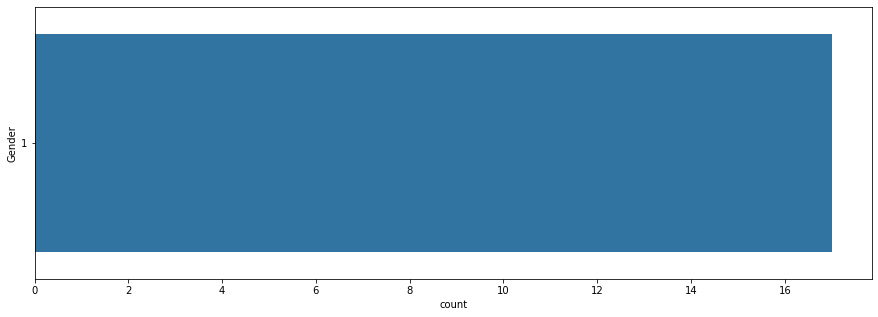

In [ ]:
#Count Plot of Gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = cluster_4)
plt.show()

Dari grafik di atas, ternyata pada cluster 4 secara keseluruhan diisi oleh **Female**

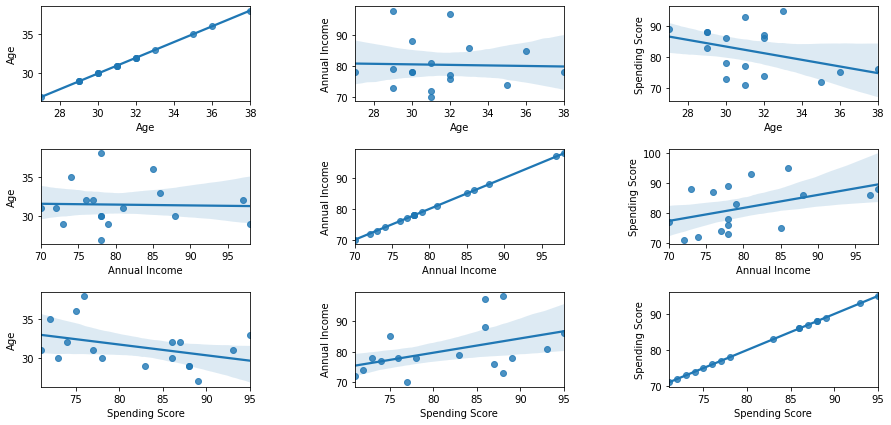

In [ ]:
#Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = cluster_4)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

1. Jika kita lihat pada grafik **Spending Score vs Annual Income**<br>

Terlihat ada trend naik, dimana ketika Annual Income membesar  Spending Score ikut membesar.<br>

Menurut kami cluster ini sudah sesuai, sehingga tidak diperlukan treatment khusus.  

# ------------------------------------------------------------------------------------------------------------

### Cluster 5

In [ ]:
cluster_5 = X_hc[X_hc['cluster']==5]
cluster_5

,Gender,Age,Annual Income,Spending Score,cluster
123,0,39,69,91,5
127,0,40,71,95,5
129,0,38,71,75,5
131,0,39,71,75,5
141,0,32,75,93,5
149,0,34,78,90,5
151,0,39,78,88,5
173,0,36,87,92,5
179,0,35,93,90,5


In [ ]:
a.loc[5] # min max di cluster 5

amax  Age               40
      Annual Income     93
      Spending Score    95
amin  Age               32
      Annual Income     69
      Spending Score    75
Name: 5, dtype: int64

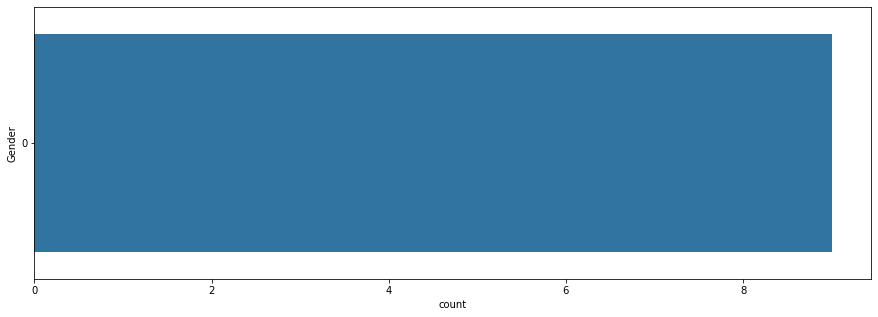

In [ ]:
#Count Plot of Gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = cluster_5)
plt.show()

Dari grafik di atas, ternyata pada cluster 5 secara keseluruhan diisi oleh **Male**

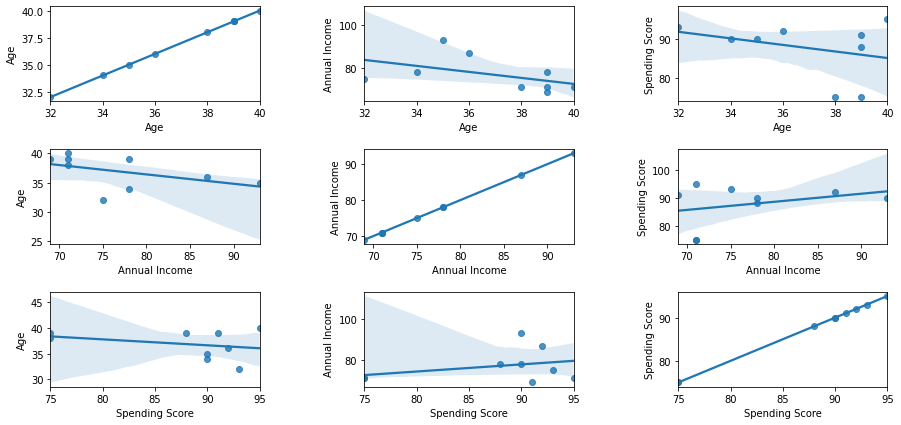

In [ ]:
#Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = cluster_5)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

1. Jika kita lihat pada grafik **Spending Score vs Annual Income**<br>

Terlihat ada trend naik, dimana ketika Annual Income membesar  Spending Score ikut membesar.<br>

Menurut kami cluster ini sudah sesuai, sehingga tidak diperlukan treatment khusus. 